### Name:-Shital Ashok Gaikwad

### Project Name:-Dry_Beans_Prediction

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

### Import Dataset

In [2]:
dataset=pd.read_excel(r"D:\Datasets\Dry_Bean_Dataset.xlsx")
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### Basic Information About dataset.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
dataset.shape

(13611, 17)

### Check Null Values

In [5]:
#Check there is any null values present in dataset.
dataset.isnull().any()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool

In [6]:
#Check how many null values present in dataset.
dataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Result:-
* There is no Null Values present in the dataset.

### Exploratory Data Analysis (EDA)

In [7]:
#Basic statistical information about dataset.
dataset.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
# Correlation between each columns of the Dataset.
cor=dataset.corr()
cor

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


Text(0.5, 1.0, 'Heatmap of Correlation of Dataset')

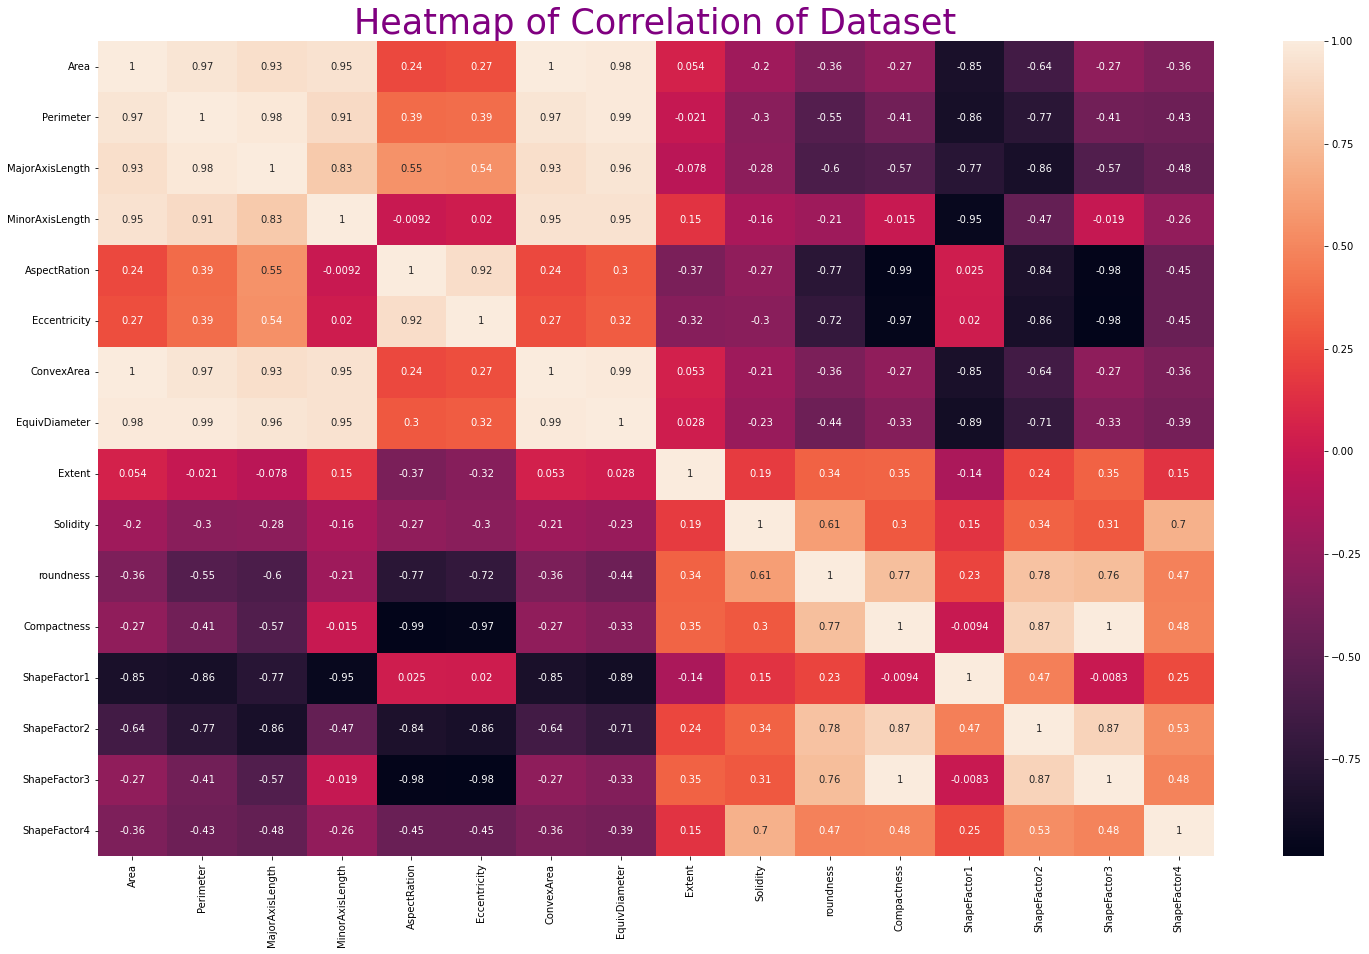

In [9]:
plt.figure(figsize=(25,15))
sns.heatmap(cor,annot=True,fmt="0.2g")
plt.title("Heatmap of Correlation of Dataset",fontsize=35,color="purple")

In [10]:
dataset["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


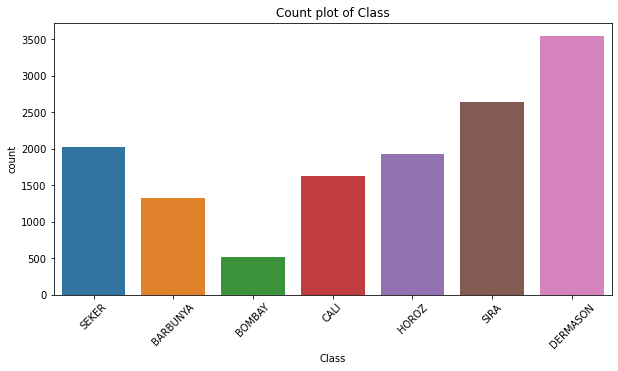

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(dataset["Class"])
plt.title("Count plot of Class")
plt.xticks(rotation=45)
plt.show()

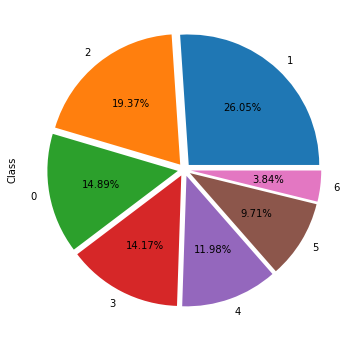

In [45]:
plt.figure(figsize=(10,6))
dataset["Class"].value_counts().plot(kind="pie",autopct="%1.2f%%",explode=[0.05]*7)
plt.show()

### Result:-
* There are 7 classes of the dry beans & Dermason has maximum count in the data.

In [14]:
dataset["Class"]=dataset["Class"].map({"SEKER":0,"DERMASON":1,"SIRA":2,"HOROZ":3,"CALI":4,"BARBUNYA":5,"BOMBAY":6})

### Check distribution of each columns.

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


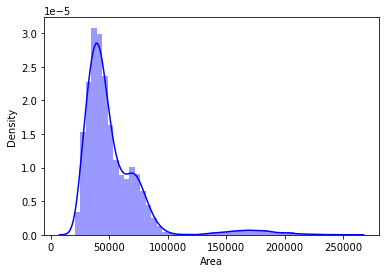

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


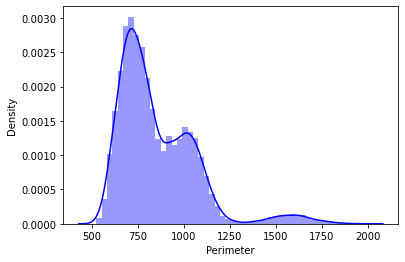

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


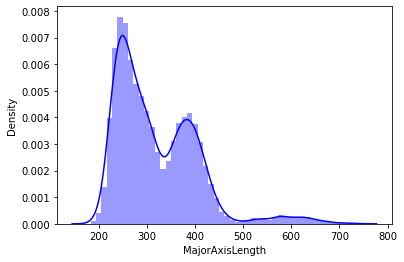

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


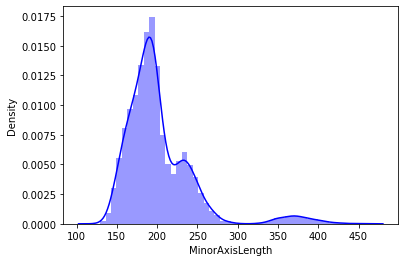

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


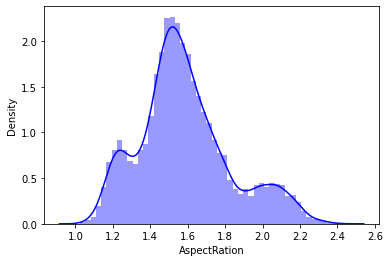

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


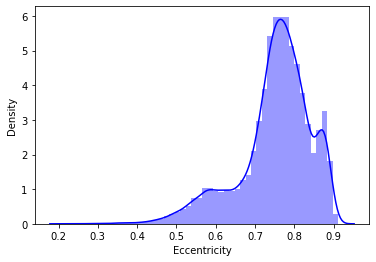

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


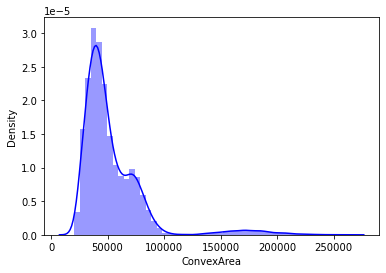

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


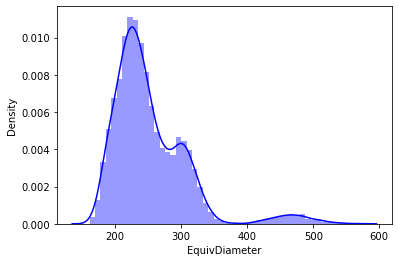

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


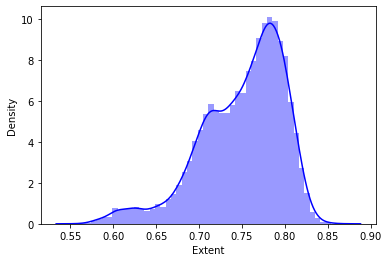

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


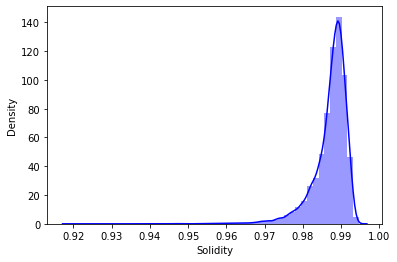

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


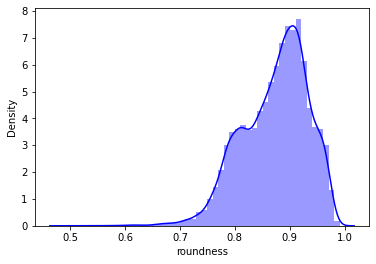

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


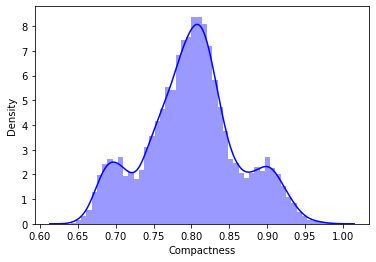

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


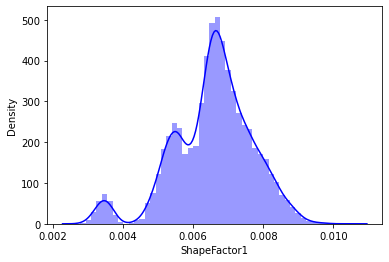

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


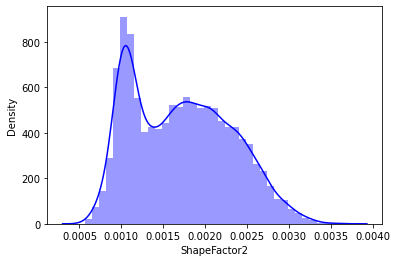

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


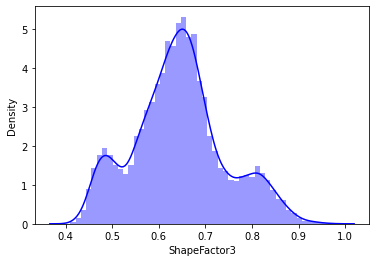

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


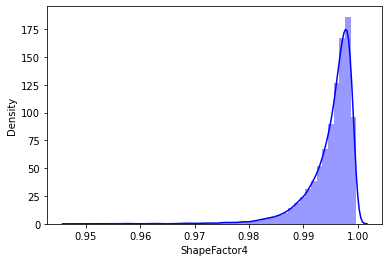

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


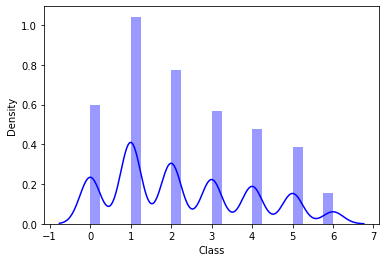

In [15]:
col=dataset.columns
for i in col:
    sns.distplot(dataset[i],color="blue")
    plt.show()

### Check outliers in each column using boxplot.

D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_dec

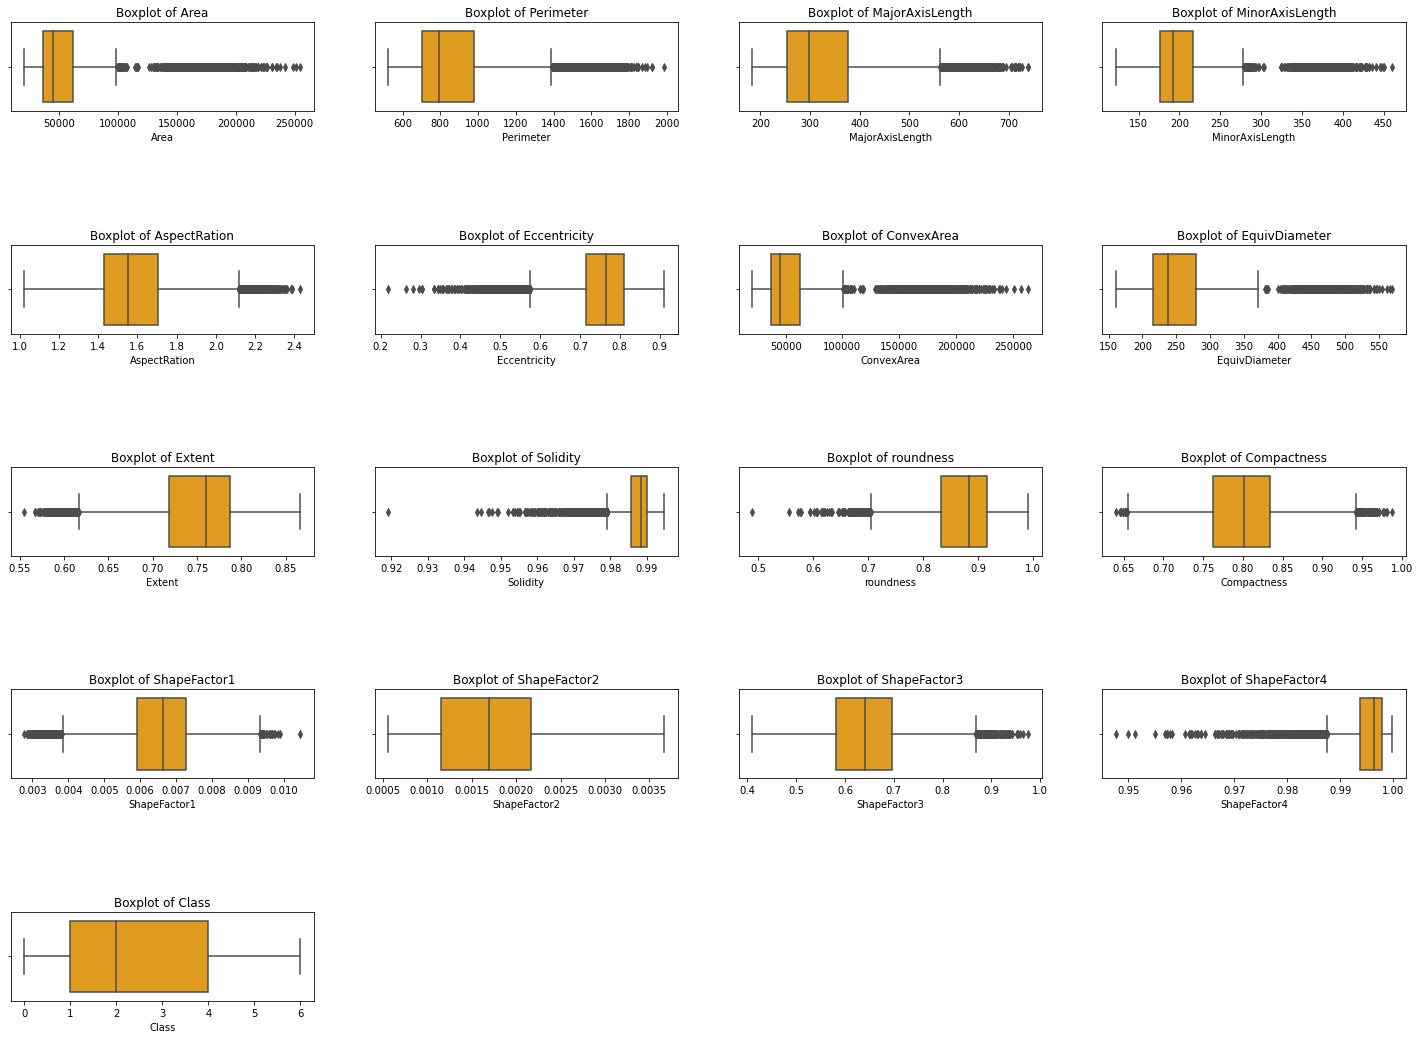

In [16]:
col=dataset.columns
n=0
plt.figure(figsize=(25,18))
for i in col:
    n+=1
    if n<=17:
        plt.subplot(5,4,n)
        plt.subplots_adjust(hspace=1.5,wspace=0.2)
        sns.boxplot(dataset[i],color="orange")
        plt.title("Boxplot of {}".format(i))
plt.show()    

### Result:-
* Outliers present in dataset.
* To remove this outliers use min max scaler (Normalization technique)

### Data seperation in independent and dependent data.

In [17]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

### Remove outliers using Normalization (Min Max Scaler..)

In [18]:
from  sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
ind_data=sc.fit_transform(x)
Ind_data=pd.DataFrame(ind_data)
Ind_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342


### Data Imbalancing Technique (Using Over Sampling SMOTE)

In [19]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
X,Y=s.fit_resample(x,y)

In [20]:
from collections import Counter

In [21]:
Counter(Y)

Counter({0: 3546, 5: 3546, 6: 3546, 4: 3546, 3: 3546, 2: 3546, 1: 3546})

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

### K Nearest Neighbors Classifier (KNN Classifier)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
k1= KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
k1.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred=k1.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
print("Accuracy of the KNN Classsifier is ",ac,"%")

Accuracy of the KNN Classsifier is  82.45720040281974 %


### Gaussian (Normal) Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [27]:
y_pred1=nb.predict(x_test)

In [28]:
ac1=accuracy_score(y_test,y_pred1)*100
print("Accuracy of the Naive Bayes Classsifier is ",ac1,"%")                

Accuracy of the Naive Bayes Classsifier is  76.71701913393755 %


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=5,criterion="entropy",max_depth=3,random_state=111)

In [30]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=5,
                       random_state=111)

In [31]:
y_pred2=rfc.predict(x_test)

In [32]:
ac2=accuracy_score(y_test,y_pred2)*100
print("Accuracy of the Random Forest Classsifier is ",ac2,"%")

Accuracy of the Random Forest Classsifier is  87.15005035246726 %


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred4=dt.predict(x_test)

In [36]:
ac4=accuracy_score(y_test,y_pred4)*100
print("Accuracy of the Decision Tree Classsifier is ",ac4,"%")

Accuracy of the Decision Tree Classsifier is  93.1117824773414 %


### Ensemble Techniques ( Voting Classifier )

In [37]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=([("knn",k1),("naive bayes",nb),("random forest",rfc),("Decision Tree",dt)]))

In [38]:
vt.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('naive bayes', GaussianNB()),
                             ('random forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     n_estimators=5,
                                                     random_state=111)),
                             ('Decision Tree', DecisionTreeClassifier())])

In [39]:
pred5=vt.predict(x_test)

In [40]:
ac5=accuracy_score(y_test,pred5)*100
print("Accuracy of the Voting Classsifier is ",ac5,"%")

Accuracy of the Voting Classsifier is  90.01007049345418 %


### Comparison of Actual value & Predicted Value

In [41]:
df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":pred5})
df

,Actual Value,Predicted Value
0,3,3
1,1,1
2,2,2
3,1,1
4,3,3
...,...,...
4960,0,0
4961,6,6
4962,3,1
4963,1,1


### comparison of Line plot of first 500 observations with respect to actual & predicted value.

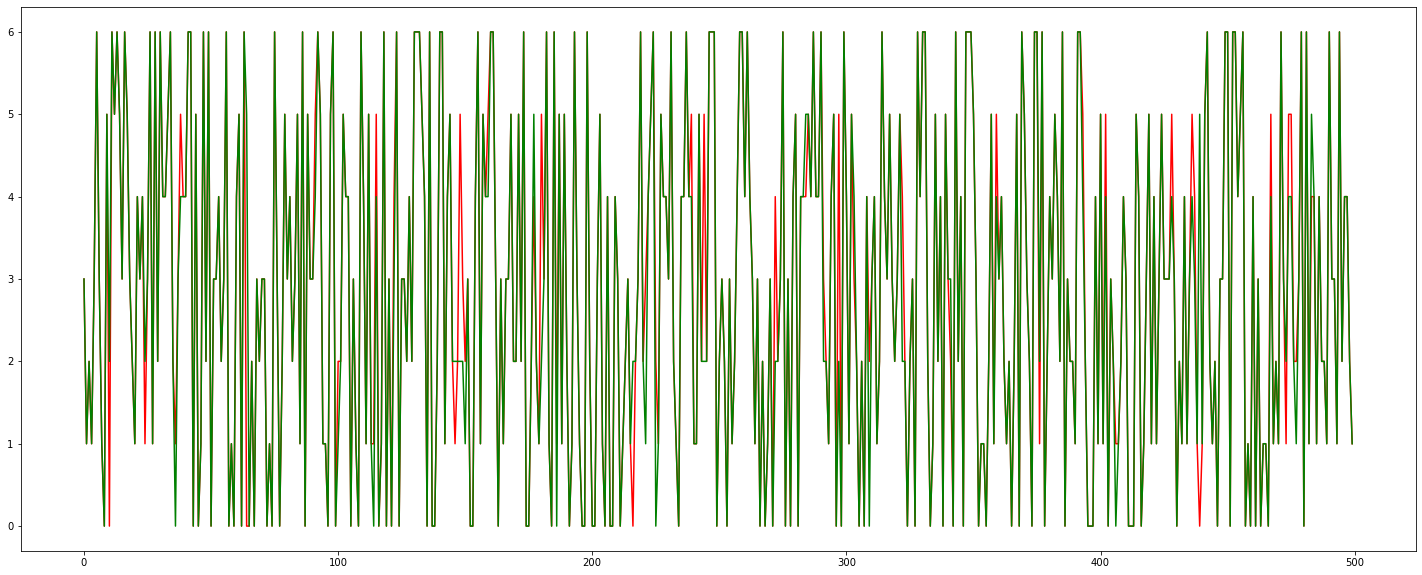

In [42]:
plt.figure(figsize=(25,10))
plt.plot(df["Actual Value"].head(500),linestyle="-",color="red")
plt.plot(df["Predicted Value"].head(500),linestyle="-",color="green")

### comparison of Line plot of last 500 observations with respect to actual & predicted value.

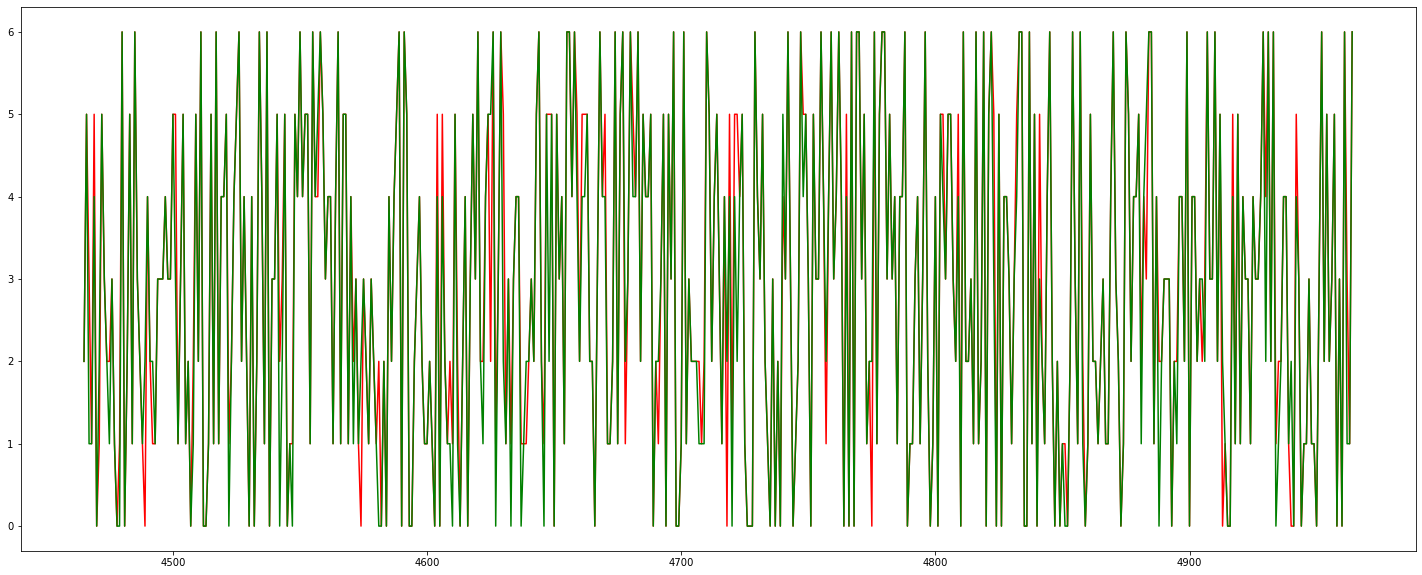

In [43]:
plt.figure(figsize=(25,10))
plt.plot(df["Actual Value"].tail(500),linestyle="-",color="red")
plt.plot(df["Predicted Value"].tail(500),linestyle="-",color="green")

### Result:-
* In above line plot , green line shows the Predicted value & red line shows actual value.

### Pie chart

<AxesSubplot:title={'center':'Pie Chart of Predicted Value'}, ylabel='Predicted Value'>

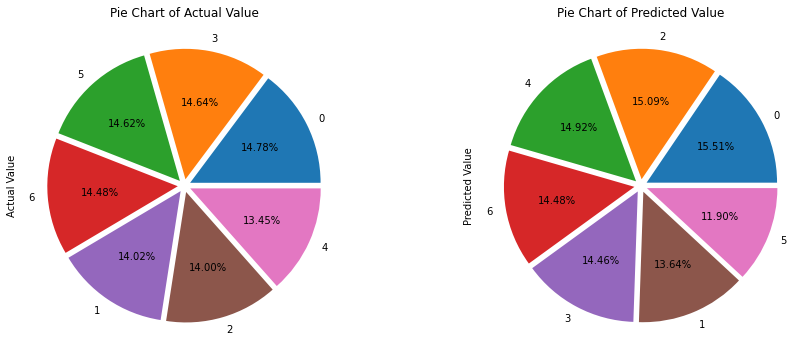

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Pie Chart of Actual Value")
df["Actual Value"].value_counts().plot(kind="pie",autopct="%1.2f%%",explode=[0.05]*7)
plt.subplot(1,2,2)
plt.title("Pie Chart of Predicted Value")
df["Predicted Value"].value_counts().plot(kind="pie",autopct="%1.2f%%",explode=[0.05]*7)